In [375]:
import pandas as pd
import numpy as np
import seaborn as seb
import matplotlib.pyplot as plt

#PROBLEM STATEMENT

##Specifying the question

A dataset of the passenger of the titanic are given. Can the survival of each the passengers be predicted using a K-Nearest Neighbor classifier?

##Defining the metric of success

An aim is made to have a model that will test to at least 80% accuracy for the internal data (data split 20% to test and 80%to train)

##Recording the experimental design

The following methods shall be used within the study to attain the aforementioned objectives that have been set out:
1. Simple Reading
2. Exploratory data analysis
3. K-Nearest Neighbor

##Data Relevance


The data was acquired from the internet; which means it is accurate.

#READING AND EXPLORING THE DATA

In [376]:


tr = pd.read_csv('/content/train (5).csv')
te = pd.read_csv('/content/test (1).csv')

In [377]:
tr.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [378]:
tr.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q


In [379]:
te.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [380]:
te.tail(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [381]:
tr.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [382]:
tr.shape

(891, 12)

In [383]:
te.shape

(418, 11)

#APPROPRIATENESS OF THE DATA

Due to the nature of the data and its origin; the data shall be taken as being integral since it originated a long long while ago.

#DATA PROCESSING

##Cleaning of the data

In [384]:
tocleantr = tr.copy()
tocleante = te.copy()

In [385]:
tocleantr.duplicated().sum()

0

In [386]:
tocleante.duplicated().sum()

0

In [387]:
tocleantr.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [388]:
tocleante.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [389]:
tocleantr.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [390]:
tocleante.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [391]:
tocleante['Age'].fillna(int(tocleante['Age'].mean()), inplace=True)
tocleantr['Age'].fillna(int(tocleantr['Age'].mean()), inplace=True)
tocleante['Fare'].fillna(int(tocleante['Fare'].mean()), inplace=True)

In [392]:
import random 

emb = tocleantr['Embarked'].unique()
gh = tocleantr[tocleantr['Embarked'].isnull()].index
gh = gh.tolist()
for i in gh:
  embfil = emb[random.randint(0,2)]
  tocleantr.loc [ i , 'Embarked'] = embfil
  print(embfil) 

C
Q


In [393]:
tocleante.drop(columns= ['Cabin'], inplace= True)
tocleantr.drop(columns= ['Cabin'], inplace= True)

In [394]:
tocleante.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [395]:
tocleantr.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

##UNDERSTANDING THE DATA

In [396]:
tocleantr.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
5,6,0,3,"Moran, Mr. James",male,29.0,0,0,330877,8.4583,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C


In [397]:
tocleante.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [398]:
tocleantr = pd.merge(tocleantr , pd.get_dummies(tocleantr['Sex']) , left_index=True , right_index=True)
tocleante = pd.merge(tocleante , pd.get_dummies(tocleante['Sex']) , left_index=True , right_index=True)

In [399]:
tocleante.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Embarked', 'female', 'male'],
      dtype='object')

In [400]:
todrop= ['PassengerId', 'Name' , 'Ticket' , 'Sex', 'male']
tocleante.drop(columns= todrop, inplace= True)
tocleantr.drop(columns= todrop, inplace= True)

#EXPLORATORY DATA ANALYSES

In [401]:
toedatr = tocleantr.copy()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


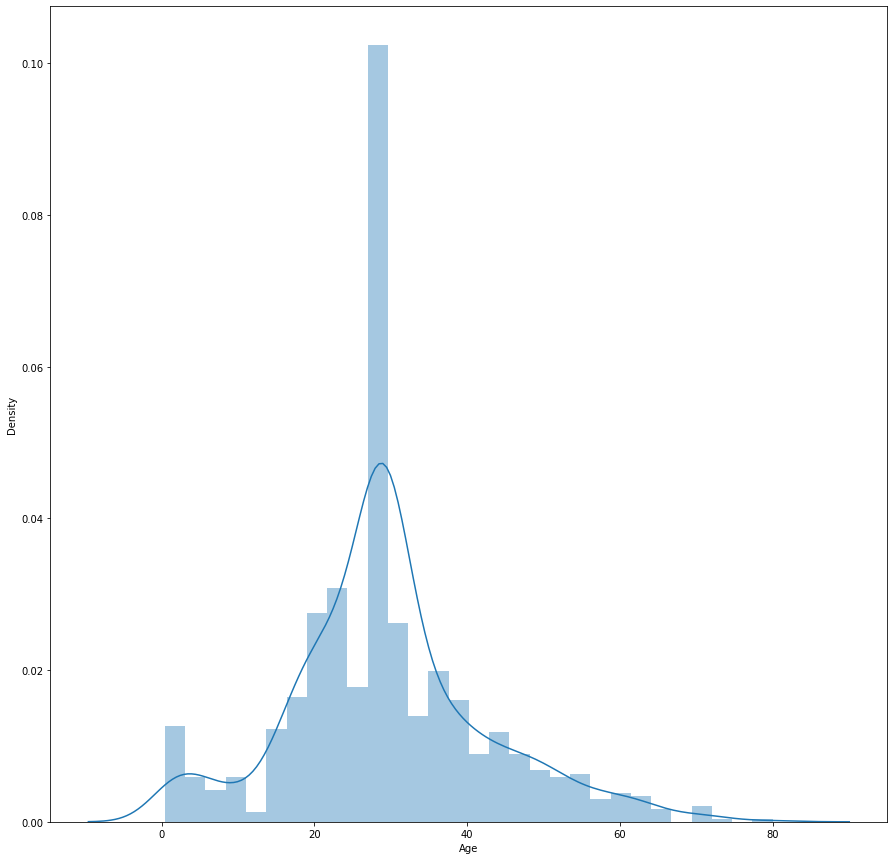

In [402]:
plt.figure(figsize=(15,15))
seb.distplot(toedatr['Age'])
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

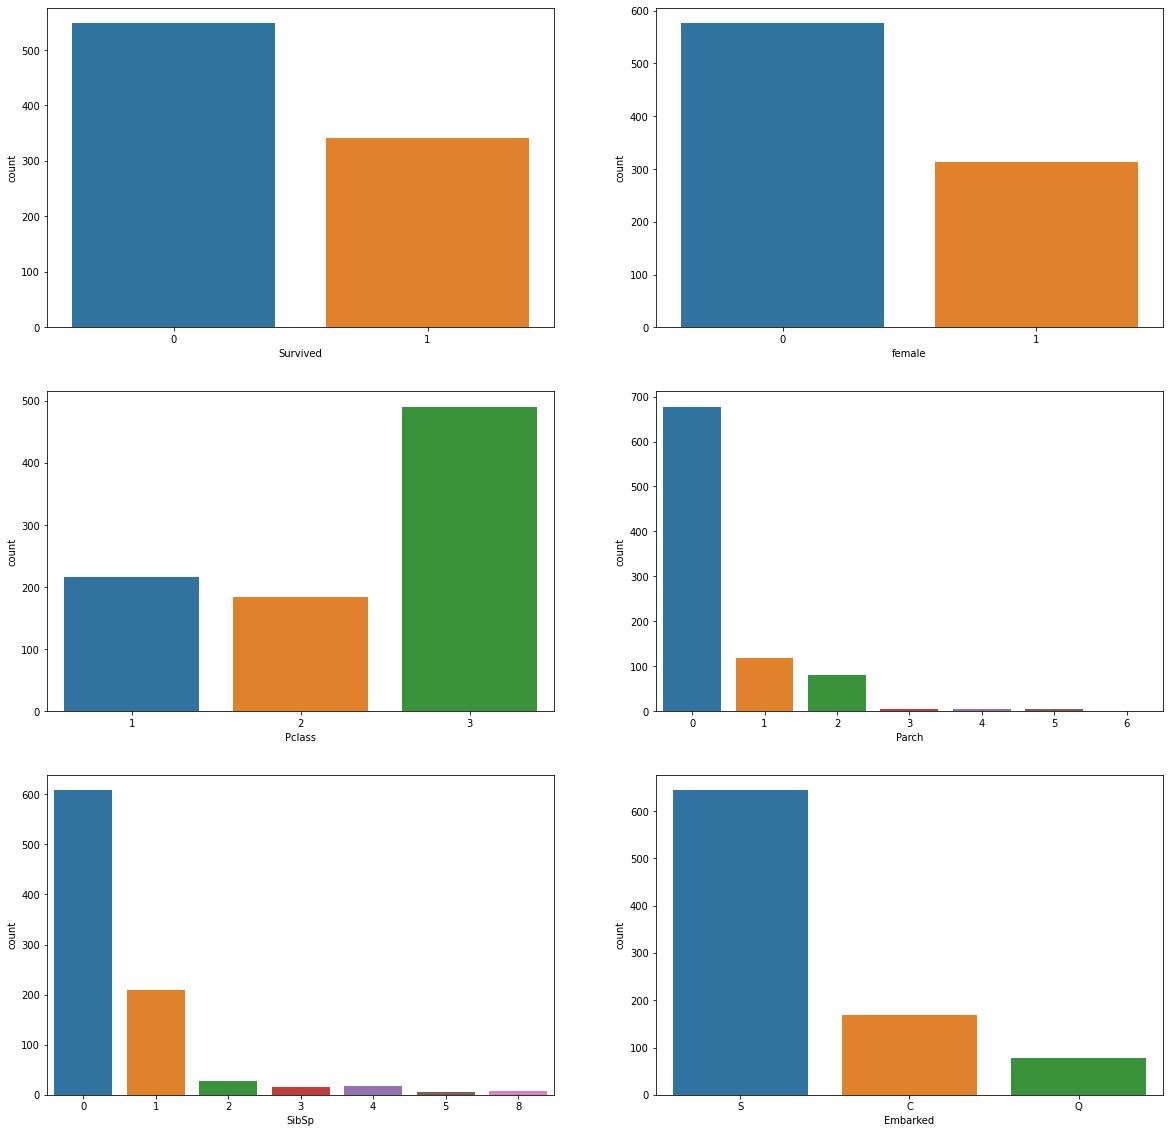

In [404]:
colcount = ['Survived' ,'female' ,'Pclass' , 'Parch' , 'SibSp' , 'Embarked']

f ,a = plt.subplots(nrows = 3 , ncols = 2 ,figsize= (20,20))
r = 1
for i in colcount:
  plt.subplot(3,2,r)
  seb.countplot(toedatr[i])
  r += 1
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

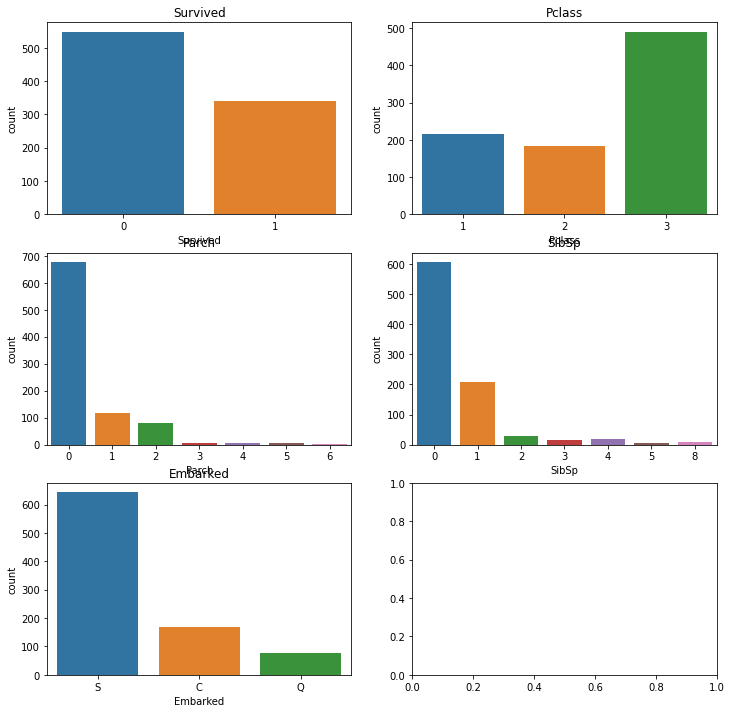

In [427]:
colcount = ['Survived' , 'Pclass' , 'Parch' , 'SibSp' , 'Embarked']

f ,a = plt.subplots(nrows = 3 , ncols = 2 ,figsize= (12,12))
r = 1
for i in colcount:
  plt.subplot(3,2,r)
  seb.countplot(toedatr[i])
  plt.title(i)
  r += 1
  
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn

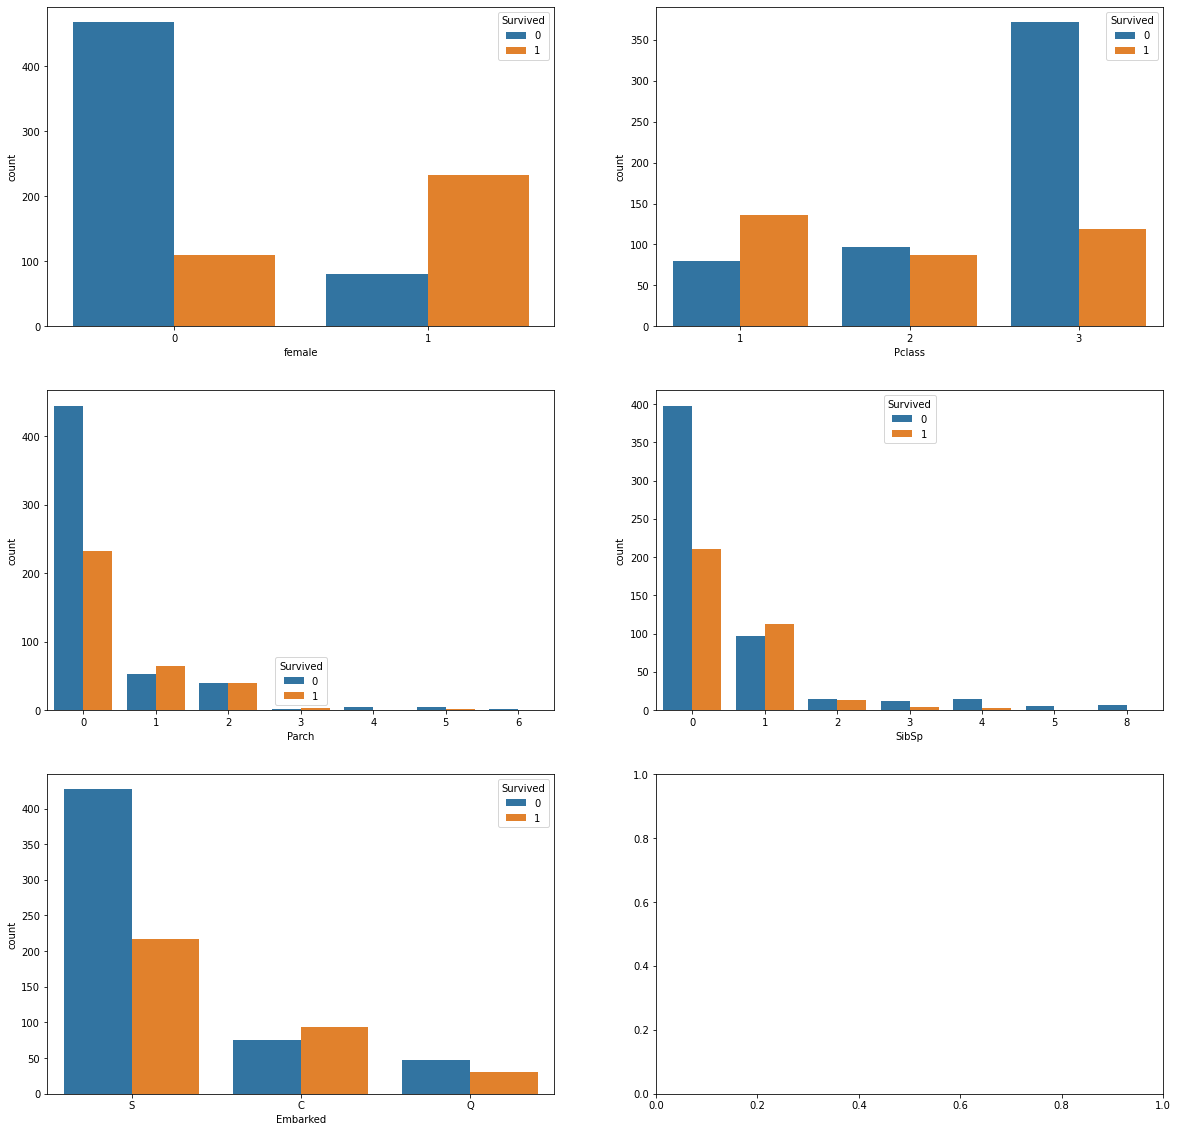

In [408]:
colcount = ['female' ,'Pclass' , 'Parch' , 'SibSp' , 'Embarked']

f ,a = plt.subplots(nrows = 3 , ncols = 2 ,figsize= (20,20))
r = 1
for i in colcount:
  plt.subplot(3,2,r)
  seb.countplot(toedatr[i], hue= 'Survived' , data=toedatr)
  r += 1
plt.show()

#CORRELATION

In [406]:
toedatr.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,female
Survived,1.000000,-0.338481,-0.067814,-0.035322,0.081629,0.257307,0.543351
Pclass,-0.338481,1.000000,-0.334974,0.083081,0.018443,-0.549500,-0.131900
Age,-0.067814,-0.334974,1.000000,-0.232978,-0.176486,0.093706,-0.082949
SibSp,-0.035322,0.083081,-0.232978,1.000000,0.414838,0.159651,0.114631
Parch,0.081629,0.018443,-0.176486,0.414838,1.000000,0.216225,0.245489
Fare,0.257307,-0.549500,0.093706,0.159651,0.216225,1.000000,0.182333
female,0.543351,-0.131900,-0.082949,0.114631,0.245489,0.182333,1.000000


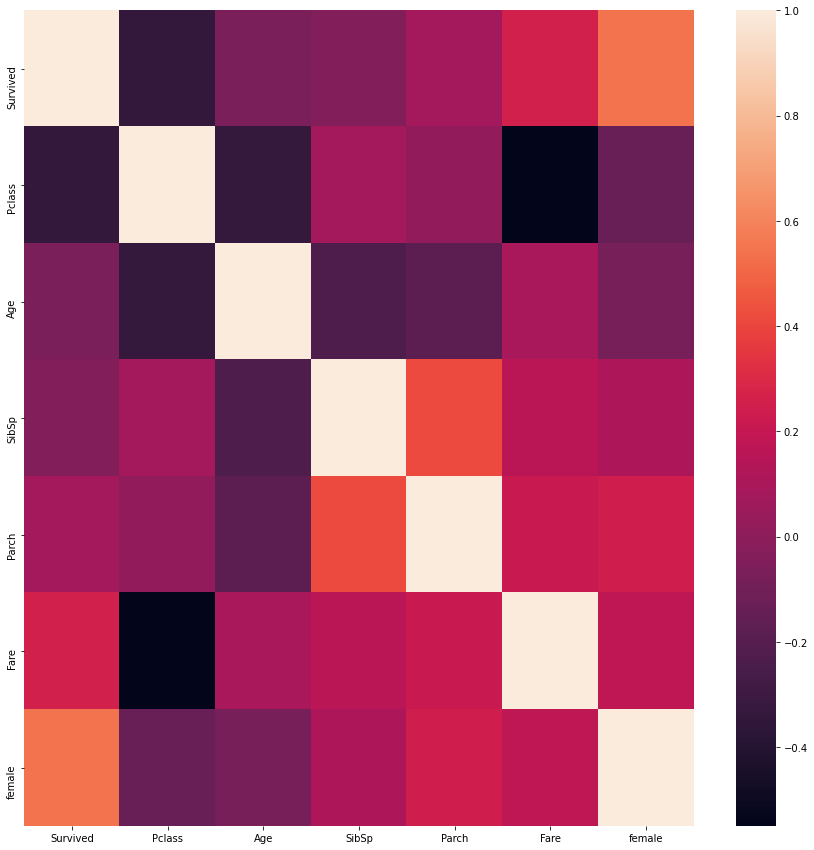

In [407]:
plt.figure(figsize= (15,15))
seb.heatmap(toedatr.corr())
plt.show()

#IMPLEMENTING THE SOLUTION

In [409]:
from sklearn.model_selection import train_test_split
tts = train_test_split
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.neighbors import KNeighborsClassifier
knnc = KNeighborsClassifier (n_neighbors = 5)

from sklearn.metrics import  accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from sklearn import metrics

In [410]:
tomod = toedatr.copy()

In [411]:
tomod['Embarked'] = le.fit_transform(tomod['Embarked'])

In [412]:
x = tomod.drop(columns= ['Survived']).values
y = tomod['Survived'].values.reshape(-1,1)

In [413]:
x = ss.fit_transform(x)

In [414]:
o = 0.2
xtr, xte = tts(x, test_size= o , random_state=0)
ytr, yte = tts(y, test_size= o , random_state=0)

###K-NEAREST NEIGHBOR

In [415]:
knnc.fit(xtr,ytr)
pred = knnc.predict(xte)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [416]:
accuracy_score(pred, yte)

0.8044692737430168

In [417]:
for u in range(0,20):
  o = 0.2
  xtr, xte = tts(x, test_size= o , random_state=u)
  ytr, yte = tts(y, test_size= o , random_state=u)

  knnc.fit(xtr,ytr)
  pred = knnc.predict(xte)

  print('State:'+ str(u)+'\t'+str(accuracy_score(pred, yte)))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was

State:0	0.8044692737430168
State:1	0.770949720670391
State:2	0.776536312849162
State:3	0.7653631284916201
State:4	0.8379888268156425
State:5	0.8547486033519553
State:6	0.7988826815642458
State:7	0.7597765363128491
State:8	0.7653631284916201
State:9	0.776536312849162
State:10	0.8156424581005587
State:11	0.8491620111731844
State:12	0.7262569832402235
State:13	0.8100558659217877
State:14	0.8100558659217877
State:15	0.8324022346368715
State:16	0.7486033519553073
State:17	0.7821229050279329
State:18	0.8324022346368715
State:19	0.8491620111731844


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  


#IMPLEMENTING THE MODEL ON THE TEST DATA

In [418]:
knncl = KNeighborsClassifier (n_neighbors = 5)

In [419]:
u = 19

o = 0.2
xtr, xte = tts(x, test_size= o , random_state=u)
ytr, yte = tts(y, test_size= o , random_state=u)

knncl.fit(xtr,ytr)
pred = knncl.predict(xte)

print('State:'+ str(u)+'\t'+str(accuracy_score(pred, yte)))

State:19	0.8491620111731844


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  import sys


In [420]:
topred = tocleante.copy()

In [421]:
topred.head(10)

,Pclass,Age,SibSp,Parch,Fare,Embarked,female
0,3,34.5,0,0,7.8292,Q,0
1,3,47.0,1,0,7.0000,S,1
2,2,62.0,0,0,9.6875,Q,0
3,3,27.0,0,0,8.6625,S,0
4,3,22.0,1,1,12.2875,S,1
5,3,14.0,0,0,9.2250,S,0
6,3,30.0,0,0,7.6292,Q,1
7,2,26.0,1,1,29.0000,S,0
8,3,18.0,0,0,7.2292,C,1
9,3,21.0,2,0,24.1500,S,0


In [422]:
topred['Embarked'] = le.fit_transform(topred['Embarked'])

In [423]:
tox = ss.fit_transform(topred)

In [424]:
prediction_column = knncl.predict(tox)

In [425]:
topred['Predicted'] = prediction_column

In [426]:
topred.head(10)

,Pclass,Age,SibSp,Parch,Fare,Embarked,female,Predicted
0,3,34.5,0,0,7.8292,1,0,0
1,3,47.0,1,0,7.0000,2,1,0
2,2,62.0,0,0,9.6875,1,0,0
3,3,27.0,0,0,8.6625,2,0,0
4,3,22.0,1,1,12.2875,2,1,0
5,3,14.0,0,0,9.2250,2,0,0
6,3,30.0,0,0,7.6292,1,1,1
7,2,26.0,1,1,29.0000,2,0,0
8,3,18.0,0,0,7.2292,0,1,1
9,3,21.0,2,0,24.1500,2,0,0


#RECOMMENDATION

Using a different machine learning algorithm to check the intergrety of the results that have been found within the study.

#CHALLENGING THE SOLUTION

Considering the time to which the data was taken as well as the observation of the study a lot cannot be concluded since this focuses on passengers and not the ship crew and we cannot verify the data.